## Prophet works best with time series that have strong seasonal effects and several seasons of historical data. So, this notebook has simple implementation of prophet model in seasonal data.

In [124]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [125]:
data=pd.read_csv("milk_production.csv")
data.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [126]:
data.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [127]:
data.drop(168,axis=0,inplace=True)

In [128]:
data.Month=pd.to_datetime(data.Month)
data.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [149]:
data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [130]:
data.columns=['ds','y']
data.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


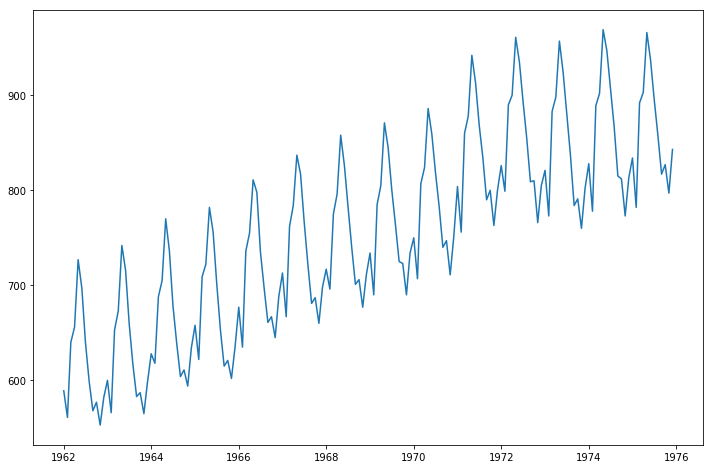

In [131]:
plt.figure(figsize=(12,8))
plt.plot(data.set_index(['ds']))

In [153]:
data.shape

(168, 2)

In [133]:
data_train,data_test=data.iloc[:100,:].copy(),data.iloc[100:,:]

In [134]:
data_train.shape,data_test.shape

((100, 2), (68, 2))

In [135]:
model=Prophet(daily_seasonality=False,
              weekly_seasonality=False,
              yearly_seasonality=False,
                interval_width=0.95
             ).add_seasonality(
               name='yearly',period=365.25,fourier_order=5
                )

In [136]:
model.fit(data_train)

In [142]:
future=model.make_future_dataframe(periods=68,freq='M') #test data count
forecast=model.predict(future)

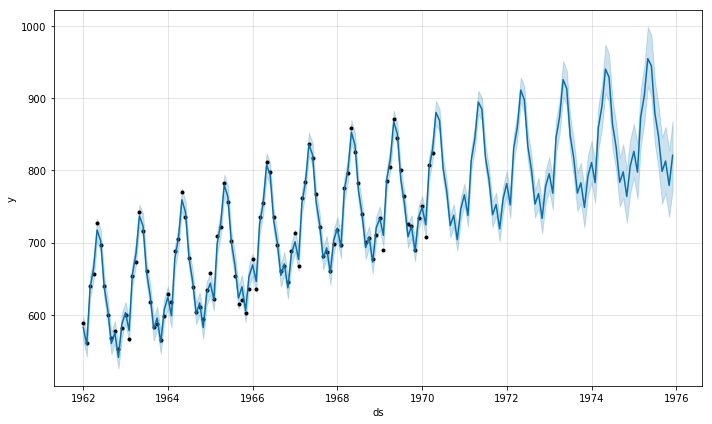

In [144]:
fig=model.plot(forecast)

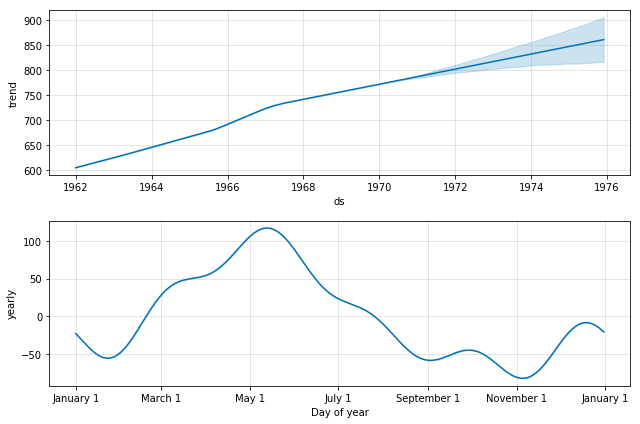

In [145]:
fig=model.plot_components(forecast)

# Forecast

In [146]:
model2=Prophet(daily_seasonality=False,
              weekly_seasonality=False,
              yearly_seasonality=False,
                interval_width=0.95
             ).add_seasonality(
               name='yearly',period=365.25,fourier_order=5
                )

In [150]:
model2.fit(data)

In [154]:
future=model2.make_future_dataframe(periods=365)
forecast=model2.predict(future)

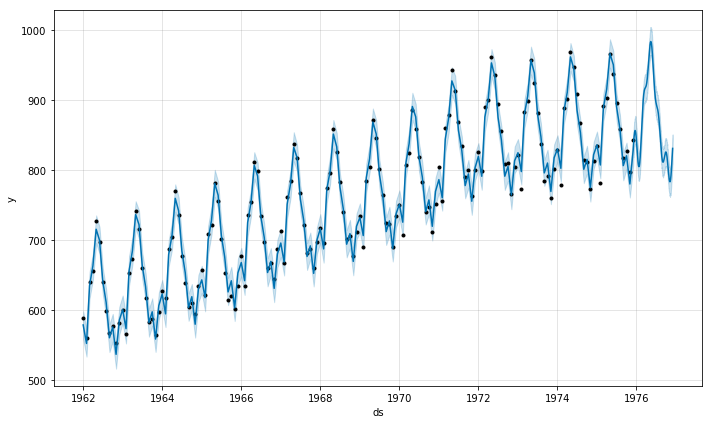

In [155]:
fig=model2.plot(forecast)